In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris, load_breast_cancer, load_wine, load_diabetes
import sys

sys.path.insert(0, '..\\CountsOutlierDetector')
from counts_outlier_detector import CountsOutlierDetector

## Simple Synthetic Example

In [2]:
det = CountsOutlierDetector()

In [3]:
a = np.random.uniform(low=0.0, high=100.0, size=(5_000, 10))

# Create a row with one unusual value
a[0, 0] = 1000.0

# Create a row with two unusual values
a[1, 0] = 1100.0
a[1, 1] = 1200.0

# Create a row with one unusual pair of values. We first set column 4 to be the same as 3 in most cases but one,
# Row 2, where they have different values.
a[:, 4] = a[:, 3]
a[2, 3] = 90.0
a[2, 4] = 5.0

# It is not necessary to pass a pandas dataframe, but this lets us specify column names
a = pd.DataFrame(a, columns=['Column A', 'Column B', 'Column C', 'Column D', 'Column E', 'Column F', 'Column G',
                             'Column H', 'Column I', 'Column J'])

# Calling predict() returns the set of outliers, along with summary information. 
# results includes an element 'Breakdown All Rows', which is useful for analysis, but not for display purposes.
# We show the 'Breakdown Flagged Rows' element, which is a condensed version of this, though also not intended
# typically for display. 
results = det.predict(a)

In [4]:
det.print_run_summary()


Number of rows: 5000
Number of columns: 10
Cardinality of the columns (after binning numeric columns): [2, 2, 7, 7, 7, 7, 7, 7, 7, 7]

1d: Number of common values (over all columns): 58
1d: Number of rare values: 2
Number of rows given score:  0:  4998
Number of rows given score:  1:     1
Number of rows given score:  2:     1

2d: Number of common combinations (over all columns): 1,558
2d: Number of rare combinations: 42
Number of rows given score:  0:  4999
Number of rows given score:  1:     1

3d: Number of common combinations (over all columns): 24,914
3d: Number of rare combinations: 6
Number of rows given score:  0:  4992
Number of rows given score:  2:     8

4d: Number of common combinations (over all columns): 5,488
4d: Number of rare combinations: 0
Number of rows given score:  0:  5000

5d: Number of common combinations (over all columns): 0
5d: Number of rare combinations: 0
Number of rows given score:  0:  5000

6d: Number of common combinations (over all columns): 0
6d:

In [5]:
# 'Flagged Summary' provides a high-level overview of what was found at each dimensionality. 

results['Flagged Summary']

,Checked_2d,Checked_3d,Checked_4d,Checked_5d,Checked_6d,Percent Flagged as 1d,Percent Flagged as 2d,Percent Flagged as 3d,Percent Flagged as 4d,Percent Flagged as 5d,Percent Flagged as 6d,Percent Flagged up to 1d,Percent Flagged up to 2d,Percent Flagged up to 3d,Percent Flagged up to 4d,Percent Flagged up to 5d,Percent Flagged up to 6d,Percent Flagged
0,True,True,True,True,True,0.04,0.02,0.16,0.0,0.0,0.0,0.04,0.06,0.22,0.22,0.22,0.22,0.22


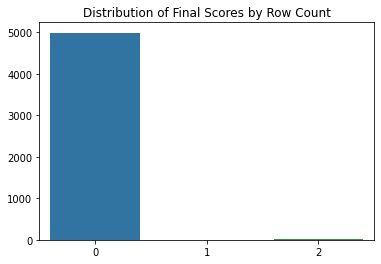

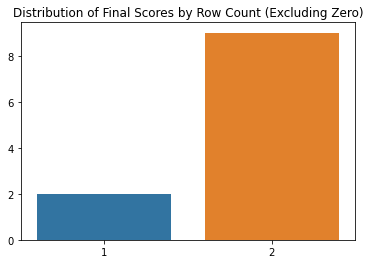

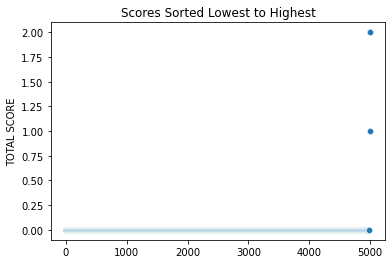

In [6]:
det.plot_scores_distribution()

In [7]:
most_flagged_df = det.get_most_flagged_rows()
most_flagged_df

,TOTAL SCORE,Column A,Column B,Column C,Column D,Column E,Column F,Column G,Column H,Column I,Column J
1,2,6,6,3,6,6,0,0,5,5,6
33,2,0,0,0,4,4,5,1,2,4,1
329,2,0,0,1,5,5,2,2,6,2,4
635,2,0,0,5,4,4,1,0,2,3,1
678,2,0,0,2,4,4,5,4,2,4,1
2157,2,0,0,6,1,1,2,6,3,3,5
2206,2,0,0,6,1,1,2,5,1,2,5
2246,2,0,0,6,1,1,1,5,1,5,5
4218,2,0,0,1,5,5,2,4,6,0,4
0,1,6,0,4,3,3,4,3,6,6,2


**Explanation row number**: 1

**Total score**: 2

### Unusual value in column: Column A

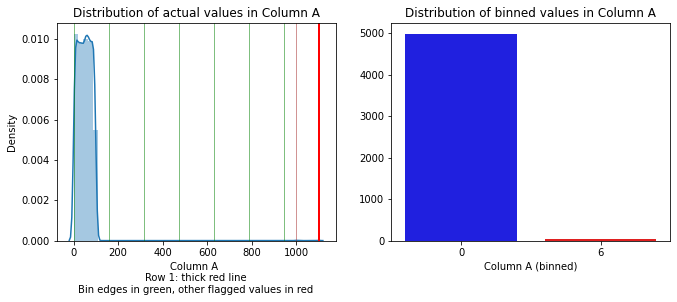

### Unusual value in column: Column B

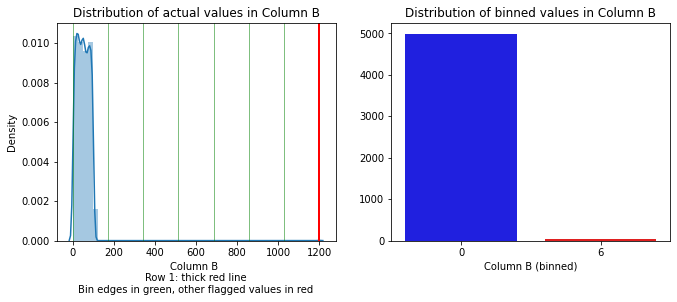

In [8]:
det.explain_row(1)

**Explanation row number**: 2

**Total score**: 1

### Unusual values in column: Column D (90.0) and in column: Column E: (5.0)

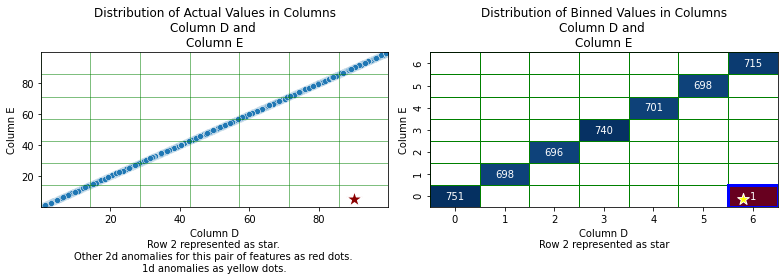

In [9]:
det.explain_row(2)

## Second Synthetic Example, using make_classification()

In [10]:
np.random.seed(0)
x, y = make_classification(
    n_samples=500, 
    n_features=6, 
    n_informative=1, 
    n_redundant=3, 
    n_repeated=1, 
    n_clusters_per_class=1)

x = pd.DataFrame(x)
x['Outlier'] = False

# Set 3 random rows to random values, setting 1 to 3 columns to realistic, but different values
x.at[0, 0] = x.iloc[1, 0]
x.at[0, 'Outlier'] = True

x.at[1, 0] = x.iloc[10, 0]
x.at[1, 1] = x.iloc[11, 1]
x.at[1, 'Outlier'] = True

x.at[2, 0] = x.iloc[30, 0]
x.at[2, 1] = x.iloc[31, 1]
x.at[2, 2] = x.iloc[32, 1]
x.at[2, 'Outlier'] = True

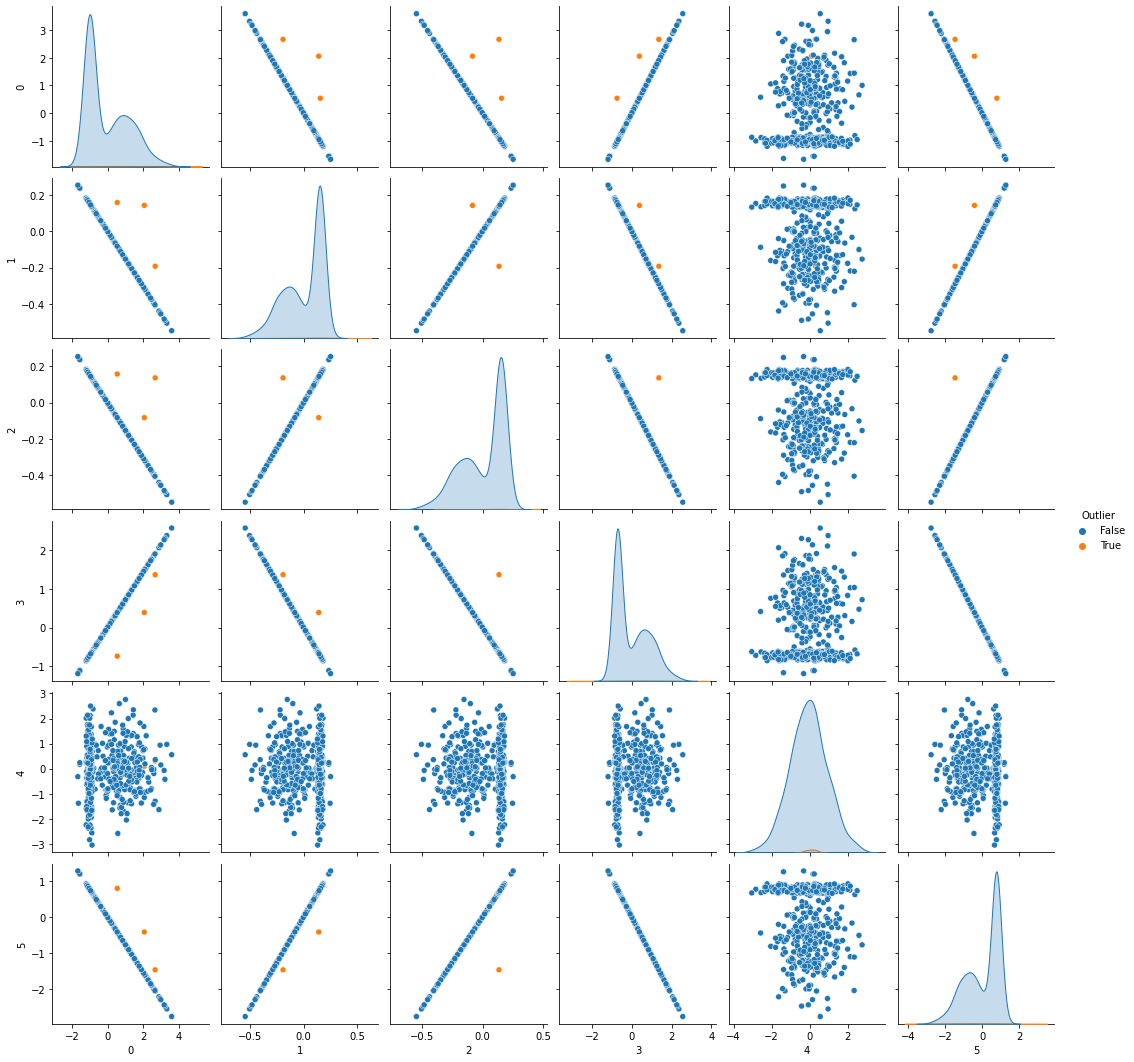

In [11]:
import warnings
warnings.filterwarnings('ignore' )

# The pair plot makes the outliers clear in some frames, though not all

sns.pairplot(x, hue='Outlier')
plt.show()

In [12]:
x_test = x.drop(columns=['Outlier'])
det = CountsOutlierDetector()
results = det.predict(x_test)

In [13]:
results.keys()

dict_keys(['Breakdown All Rows', 'Breakdown Flagged Rows', 'Flagged Summary'])

In [14]:
results['Flagged Summary']

,Checked_2d,Checked_3d,Checked_4d,Checked_5d,Checked_6d,Percent Flagged as 1d,Percent Flagged as 2d,Percent Flagged as 3d,Percent Flagged as 4d,Percent Flagged as 5d,Percent Flagged as 6d,Percent Flagged up to 1d,Percent Flagged up to 2d,Percent Flagged up to 3d,Percent Flagged up to 4d,Percent Flagged up to 5d,Percent Flagged up to 6d,Percent Flagged
0,True,True,True,True,True,0.0,3.6,0.0,0.0,0.0,0.0,0.0,3.6,3.6,3.6,3.6,3.6,3.6


In [15]:
det.get_most_flagged_rows()

,TOTAL SCORE,0,1,2,3,4,5
2,9,5,3,5,4,4,2
1,7,4,6,4,2,3,4
103,5,1,5,5,1,6,5
440,5,1,5,5,1,0,5
415,5,2,4,4,2,1,4
388,5,2,4,4,2,6,4
364,5,5,1,1,5,5,1
296,5,4,2,2,4,1,2
239,5,6,0,0,6,1,0
498,5,5,1,1,5,6,1


**Explanation row number**: 1

**Total score**: 7

### Unusual values in column: 0 (2.0561900612205175) and in column: 1: (0.14205895109750738)

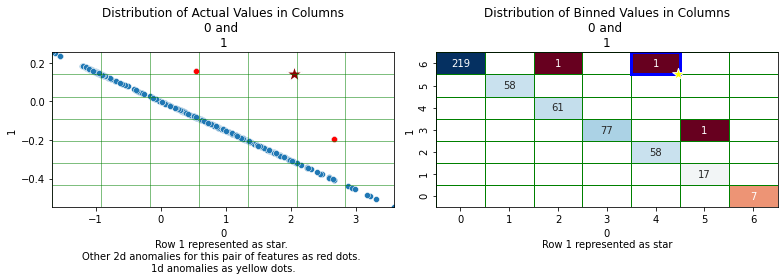

### Unusual values in column: 0 (2.0561900612205175) and in column: 2: (-0.08257733931094619)

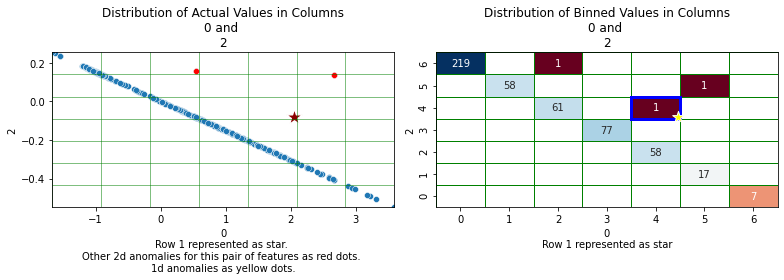

### Unusual values in column: 0 (2.0561900612205175) and in column: 3: (0.38653841866054794)

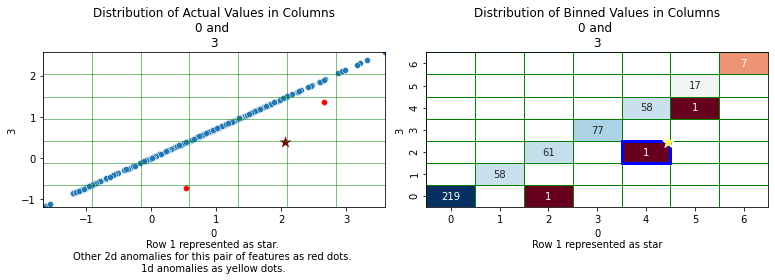

### Unusual values in column: 0 (2.0561900612205175) and in column: 5: (-0.41420306849560673)

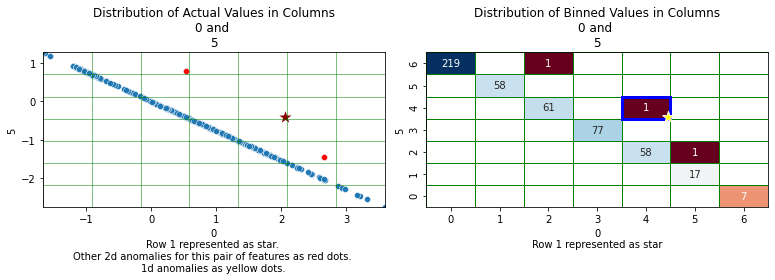

### Unusual values in column: 1 (0.14205895109750738) and in column: 2: (-0.08257733931094619)

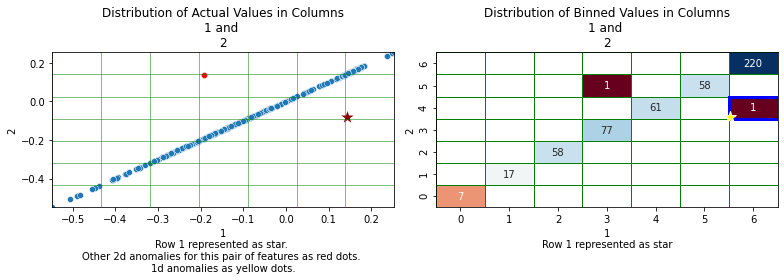

### Unusual values in column: 1 (0.14205895109750738) and in column: 3: (0.38653841866054794)

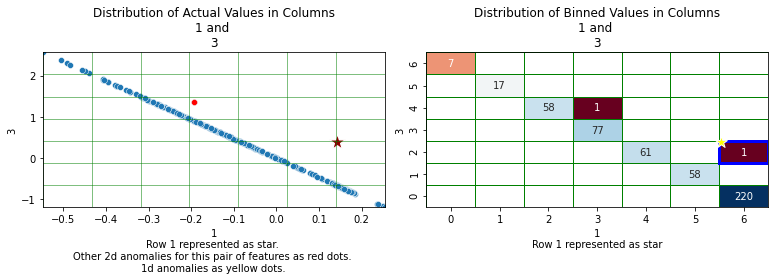

### Unusual values in column: 1 (0.14205895109750738) and in column: 5: (-0.41420306849560673)

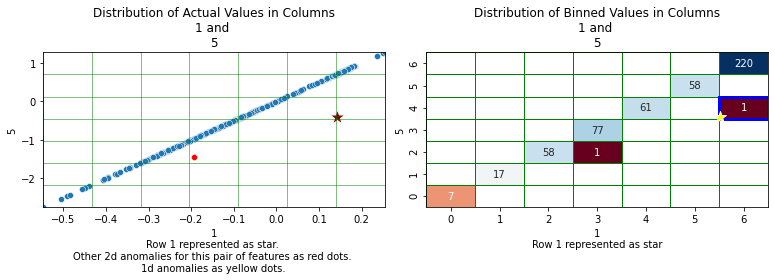

In [16]:
det.explain_row(1)

## Example with Iris Dataset

In [17]:
def get_iris():
    iris = load_iris()
    X, y = iris.data, iris.target
    X = pd.DataFrame(X, columns=iris['feature_names'])
    return X, y

def get_breast_cancer():
    X, y = load_breast_cancer(return_X_y=True, as_frame=True)
    return X, y

def get_wine():
    X, y = load_wine(return_X_y=True, as_frame=True)
    return X, y

def get_diabetes():
    X, y =load_diabetes(return_X_y=True, as_frame=True)
    return X, y

In [18]:
X,y = get_iris()
results = det.predict(X)

In [19]:
det.get_most_flagged_rows()

No rows were flagged.


,TOTAL SCORE,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


## Example with Breast Cancer Dataset

In [20]:
X,y = get_breast_cancer()
det = CountsOutlierDetector()
results = det.predict(X)

det.get_most_flagged_rows().head()

,TOTAL SCORE,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
108,136,5,2,5,4,5,5,6,6,5,...,5,2,5,3,4,4,5,6,3,1
122,110,5,2,5,4,5,5,6,6,5,...,4,2,4,3,4,2,3,5,2,1
0,108,3,0,3,2,4,5,4,5,4,...,4,0,4,3,4,4,3,6,4,2
258,71,2,3,3,1,3,6,5,4,5,...,2,3,3,1,3,3,3,5,2,2
339,71,5,3,5,4,3,2,3,4,2,...,5,3,5,4,3,1,2,5,1,1


In [21]:
results['Flagged Summary']

,Checked_2d,Checked_3d,Checked_4d,Checked_5d,Checked_6d,Percent Flagged as 1d,Percent Flagged as 2d,Percent Flagged as 3d,Percent Flagged as 4d,Percent Flagged as 5d,Percent Flagged as 6d,Percent Flagged up to 1d,Percent Flagged up to 2d,Percent Flagged up to 3d,Percent Flagged up to 4d,Percent Flagged up to 5d,Percent Flagged up to 6d,Percent Flagged
0,True,False,False,False,False,8.787346,40.59754,0.0,0.0,0.0,0.0,8.787346,40.949033,40.949033,40.949033,40.949033,40.949033,40.949033


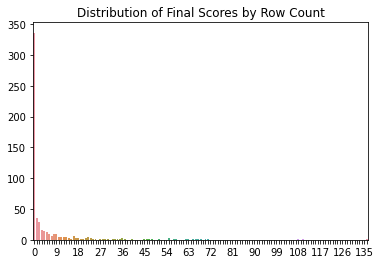

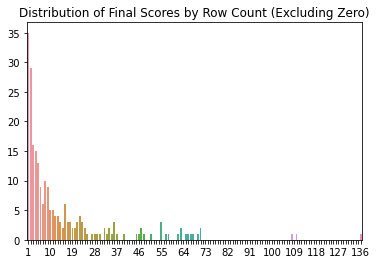

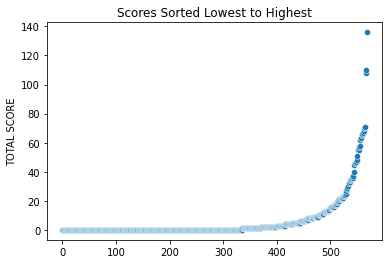

In [22]:
det.plot_scores_distribution()

**Explanation row number**: 461

**Total score**: 22

### Unusual value in column: mean radius

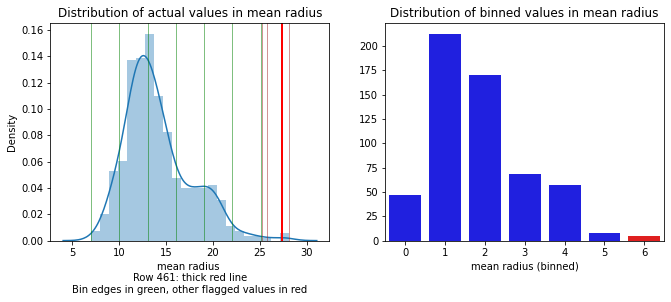

### Unusual value in column: mean perimeter

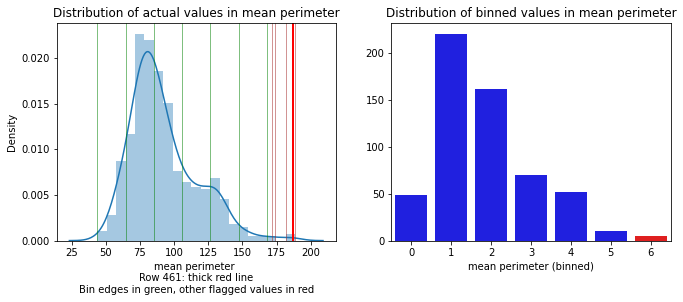

### Unusual value in column: mean area

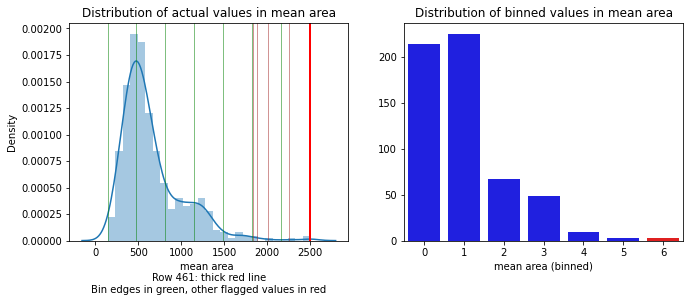

### Unusual value in column: radius error

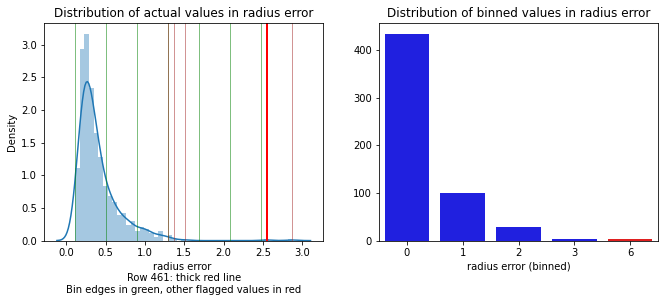

### Unusual value in column: perimeter error

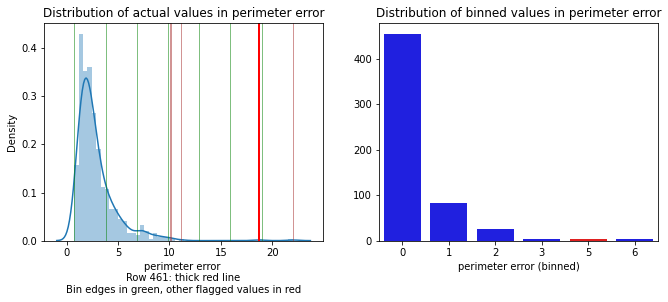

### Unusual value in column: area error

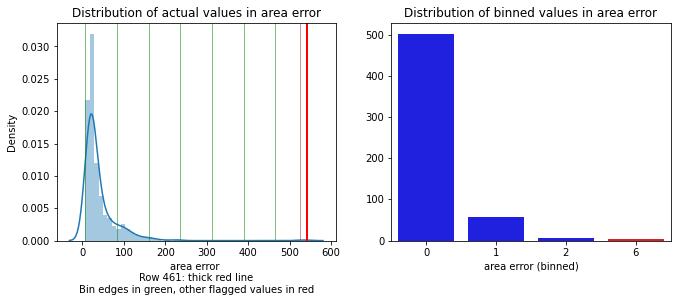

### Unusual value in column: worst radius

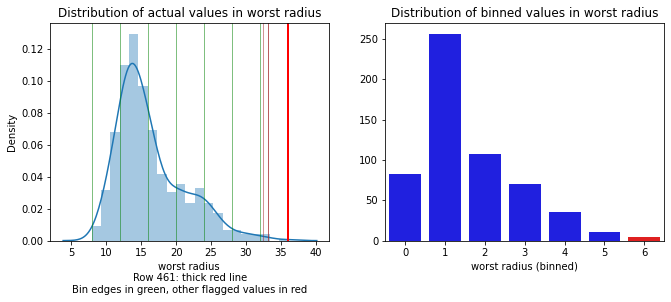

### Unusual value in column: worst perimeter

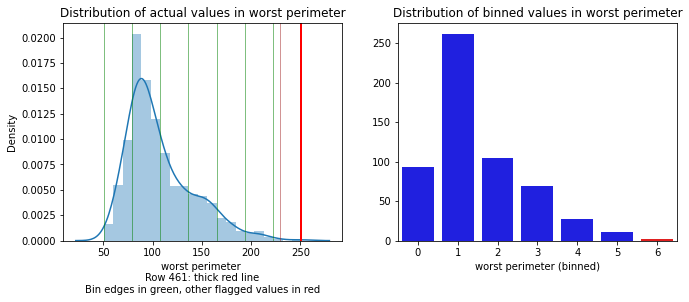

### Unusual value in column: worst area

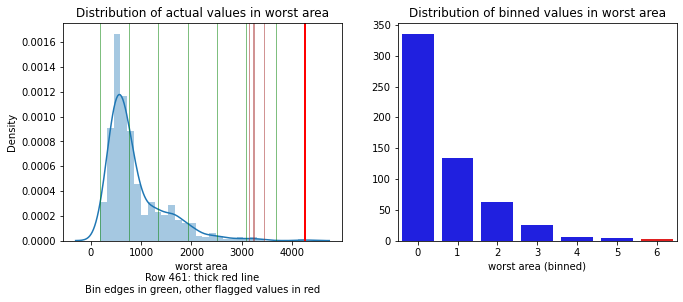

### Unusual values in column: mean compactness (0.1988) and in column: mean concavity: (0.3635)

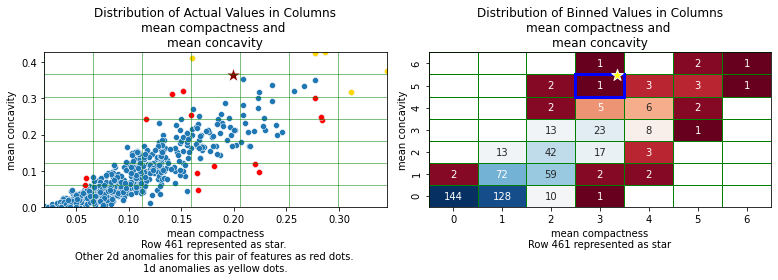

### Unusual values in column: mean compactness (0.1988) and in column: mean fractal dimension: (0.05623)

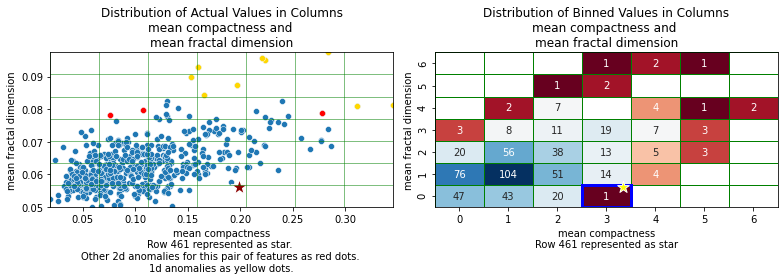

### Unusual values in column: mean concavity (0.3635) and in column: mean fractal dimension: (0.05623)

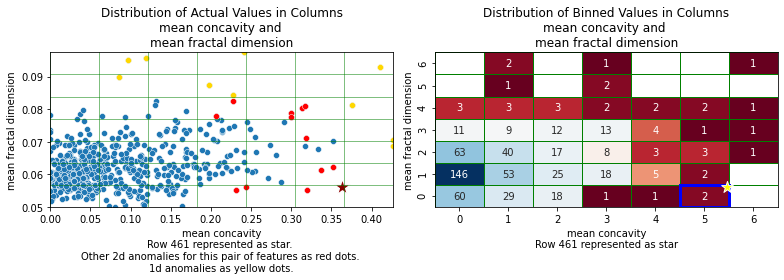

### Unusual values in column: mean concavity (0.3635) and in column: fractal dimension error: (0.004558)

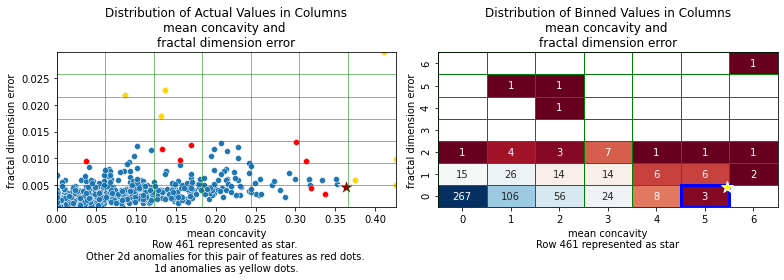

### Unusual values in column: mean concavity (0.3635) and in column: worst smoothness: (0.1357)

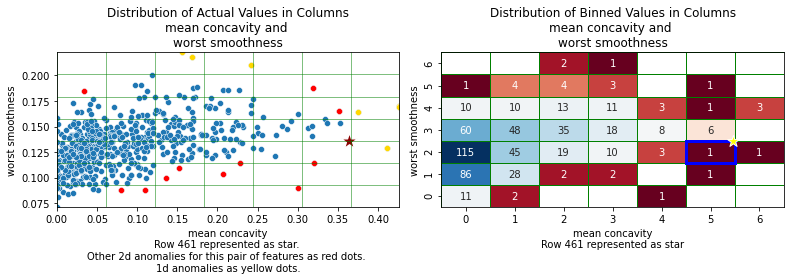

### Unusual values in column: mean concavity (0.3635) and in column: worst fractal dimension: (0.07427)

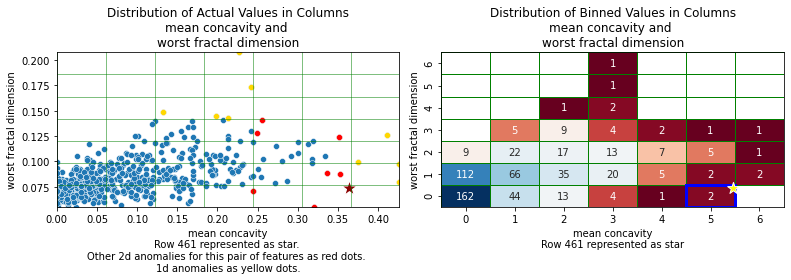

### Unusual values in column: mean concave points (0.1689) and in column: mean fractal dimension: (0.05623)

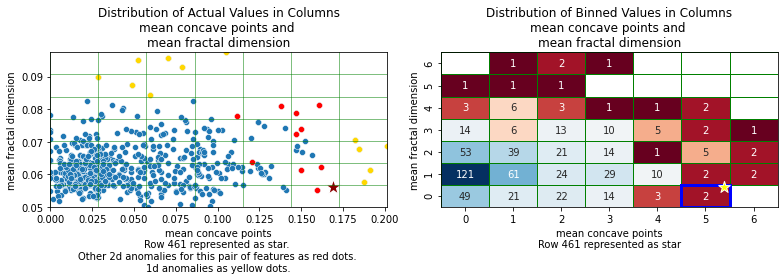

### Unusual values in column: mean concave points (0.1689) and in column: worst fractal dimension: (0.07427)

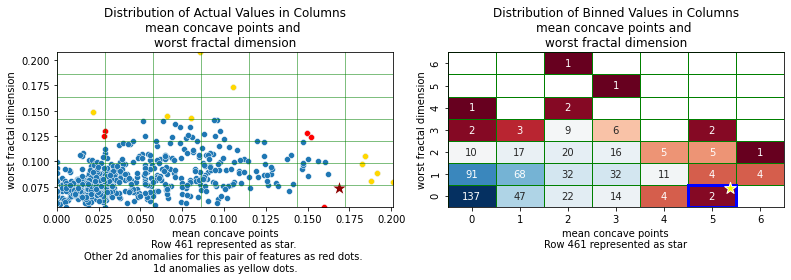

### Unusual values in column: mean fractal dimension (0.05623) and in column: concavity error: (0.08055)

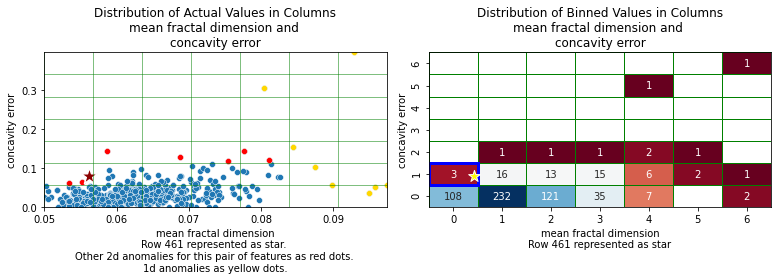

### Unusual values in column: mean fractal dimension (0.05623) and in column: worst concave points: (0.2625)

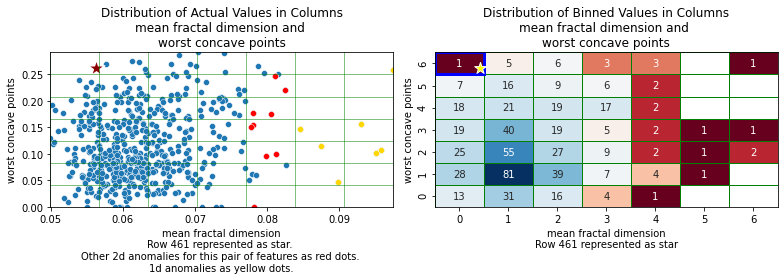

### Unusual values in column: worst smoothness (0.1357) and in column: worst concave points: (0.2625)

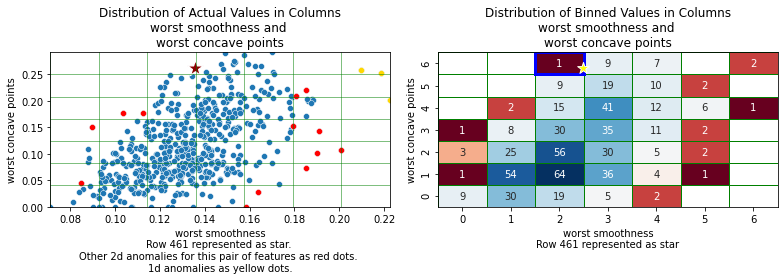

### Unusual values in column: worst concavity (0.6833) and in column: worst fractal dimension: (0.07427)

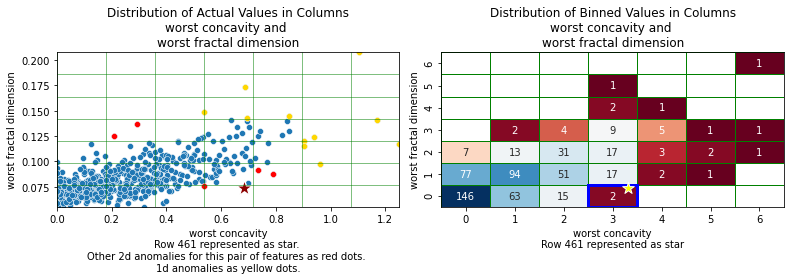

### Unusual values in column: worst concave points (0.2625) and in column: worst fractal dimension: (0.07427)

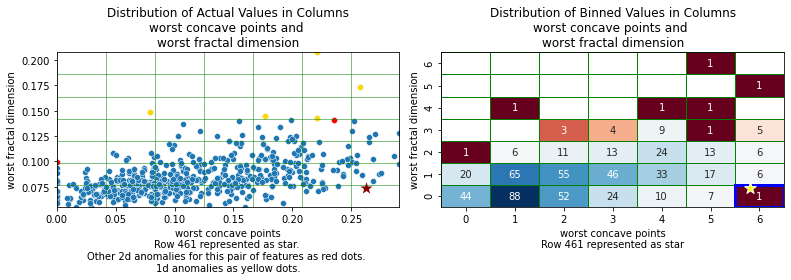

In [23]:
# Here, we expect some features to be highly correlated, which the 2d scatter
# plots demonstrate. Any unusual combinations of values can be seen intuitively
# as outliers. 

det.explain_row(461)

## Example with Wine Dataset

In [24]:
x, y = get_wine()
results = det.predict(x)

det.get_most_flagged_rows()

,TOTAL SCORE,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
59,1,2,0,0,0,1,2,0,1,0,0,3,1,1
115,1,0,1,3,3,1,3,2,5,3,0,6,4,0
121,1,0,1,6,6,3,5,6,4,3,2,2,6,0


In [25]:
results['Flagged Summary']

,Checked_2d,Checked_3d,Checked_4d,Checked_5d,Checked_6d,Percent Flagged as 1d,Percent Flagged as 2d,Percent Flagged as 3d,Percent Flagged as 4d,Percent Flagged as 5d,Percent Flagged as 6d,Percent Flagged up to 1d,Percent Flagged up to 2d,Percent Flagged up to 3d,Percent Flagged up to 4d,Percent Flagged up to 5d,Percent Flagged up to 6d,Percent Flagged
0,True,True,True,True,True,1.685393,0.0,0.0,0.0,0.0,0.0,1.685393,1.685393,1.685393,1.685393,1.685393,1.685393,1.685393


**Explanation row number**: 59

**Total score**: 1

### Unusual value in column: ash

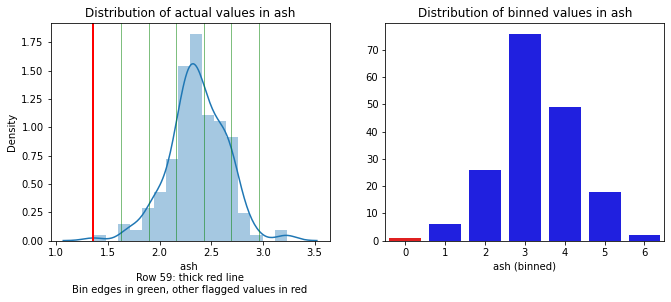

In [26]:
det.explain_row(59)

## Example with Diabetes Dataset

In [27]:
x, y = get_diabetes()
 
det = CountsOutlierDetector()
results = det.predict(x)

det.get_most_flagged_rows().head(10)

,TOTAL SCORE,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
405,15,5,1,5,5,0,0,0,1,4,2
287,10,4,0,2,2,6,5,3,2,4,3
202,9,6,1,2,4,6,4,3,2,5,2
441,8,1,0,0,0,5,3,6,0,3,3
161,8,1,1,4,5,6,5,1,4,5,5
349,8,3,1,0,1,0,1,0,2,1,1
387,7,1,0,2,1,1,2,1,1,0,1
267,7,5,0,2,0,5,4,2,2,4,4
276,7,3,0,3,5,6,4,4,1,4,2
278,7,5,1,1,0,2,3,1,2,3,4


**Explanation row number**: 422

**Total score**: 5

### Unusual values in column: age (-0.0781653239992017) and in column: bmi: (0.077863387626902)

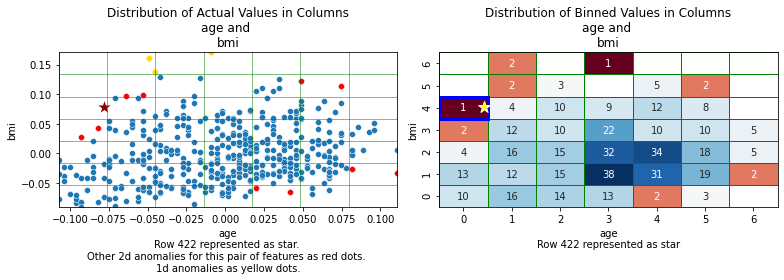

### Unusual values in column: age (-0.0781653239992017) and in column: bp: (0.0528581912385822)

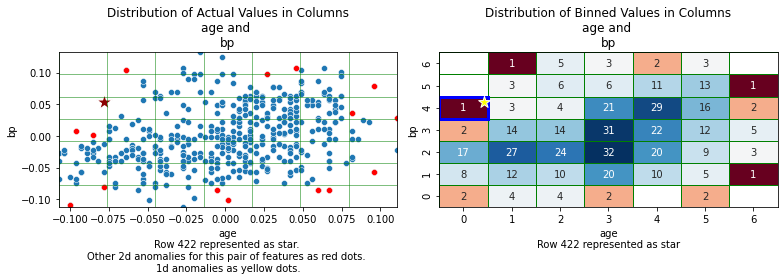

### Unusual values in column: age (-0.0781653239992017) and in column: s1: (0.0782363059554542)

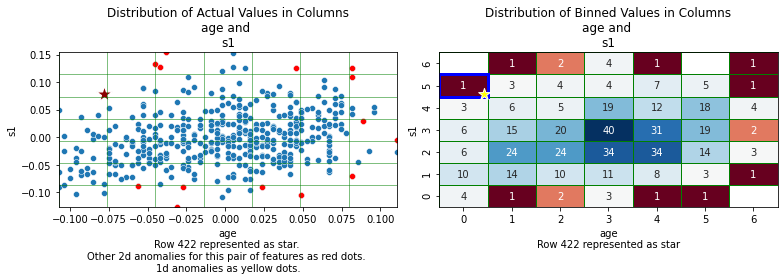

### Unusual values in column: age (-0.0781653239992017) and in column: s2: (0.0644472995495832)

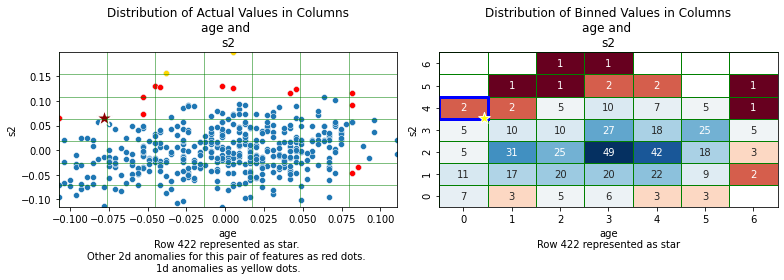

### Unusual values in column: bmi (0.077863387626902) and in column: s3: (0.0265502726256275)

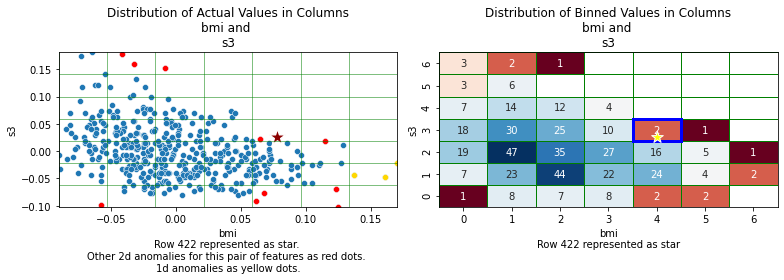

In [28]:
det.explain_row(422)